# Machine Learning Assignment – Multiple Linear Regression

Assignment: Predicting House Prices using Multiple Linear Regression

# 1.	Load the Data and import libraries 

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# 2.	Explore the Data:

In [9]:
# Load the data into a DataFrame
file_path = r'C:\Users\mahwi\OneDrive\Desktop\Assignment no 1\house_prices_data.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head().style.background_gradient()



,Square_Footage,Num_Bedrooms,House_Age,House_Price
0,3674,1,61,608468.940708
1,1360,5,57,335254.995658
2,1794,5,51,402370.090653
3,1630,2,11,311854.298045
4,1595,5,38,379356.590435


In [11]:
#o	Check for any missing values.
df.isnull().sum()

Square_Footage    0
Num_Bedrooms      0
House_Age         0
House_Price       0
dtype: int64

In [12]:
#o	Understand the basic statistics of the features and the target variable.
df.describe().style.background_gradient()

,Square_Footage,Num_Bedrooms,House_Age,House_Price
count,100.000000,100.000000,100.000000,100.000000
mean,2368.700000,2.970000,47.780000,449659.080684
std,1018.723617,1.480206,31.132684,154305.631374
min,521.000000,1.000000,0.000000,133560.988172
25%,1566.750000,1.000000,19.000000,313684.825488
50%,2468.000000,3.000000,50.000000,450938.501852
75%,3288.750000,4.000000,72.500000,568634.253802
max,3999.000000,5.000000,98.000000,756310.952144


# 3.	Visualize the data through Charts

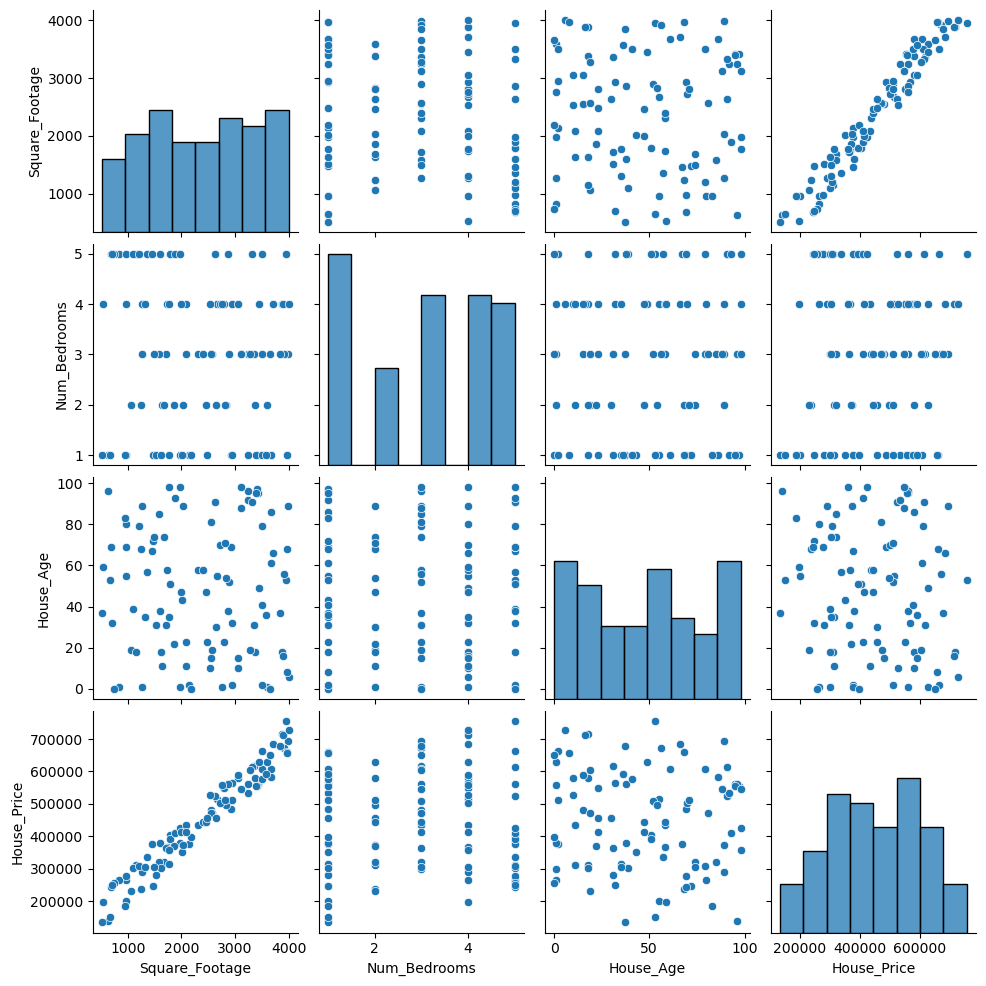

In [13]:
# 3.1	Pairplot:
sns.pairplot(df)
plt.show()

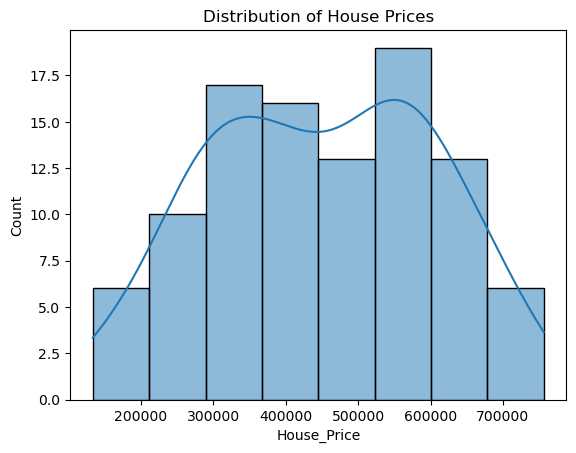

In [15]:
#3.2	Distribution Plot:
#o	Display the distribution of house prices. 
sns.histplot(df['House_Price'], kde=True)
plt.title('Distribution of House Prices')
plt.show()

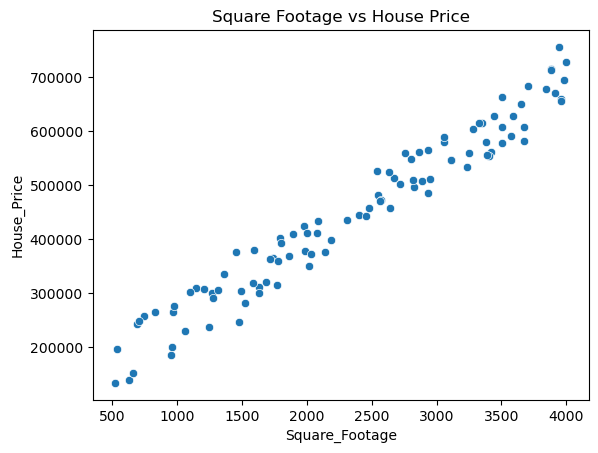

In [16]:
#3.3	Scatter Plot (Square Footage vs House Price):
#o	Show the relationship between square footage and house price. 
sns.scatterplot(x='Square_Footage', y='House_Price', data=df)
plt.title('Square Footage vs House Price')
plt.show()

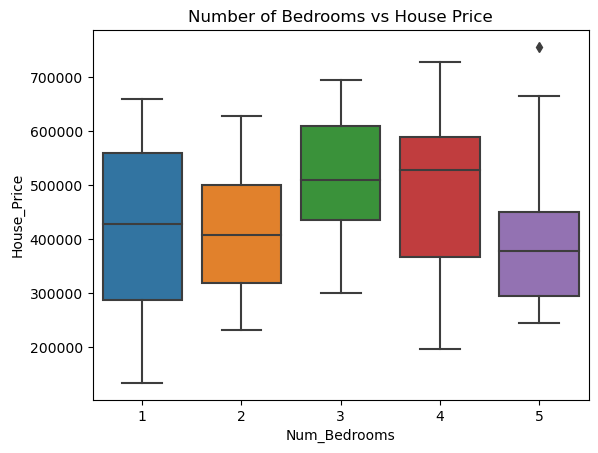

In [17]:
#3.4	Box Plot (Number of Bedrooms vs House Price):
#o	Show the distribution of house prices for different numbers of bedrooms. 
sns.boxplot(x='Num_Bedrooms', y='House_Price', data=df)
plt.title('Number of Bedrooms vs House Price')
plt.show()

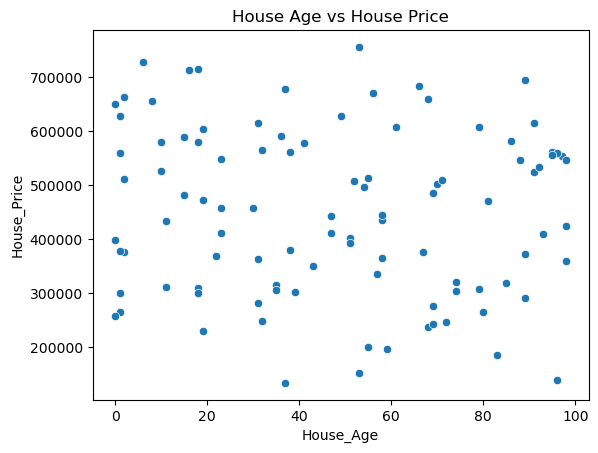

In [18]:
#3.5	Scatter Plot (House Age vs House Price):
#o	Show the relationship between house age and house price. 
sns.scatterplot(x='House_Age', y='House_Price', data=df)
plt.title('House Age vs House Price')
plt.show()

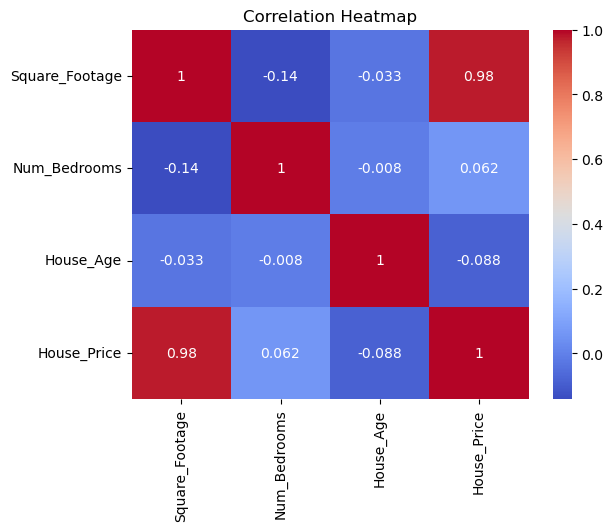

In [19]:
#3.6	Correlation Heatmap:
#o	Display the correlation coefficients between features. 
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# 4.	Split the Data:

In [20]:
#o	Split the data into training and testing sets (80% training, 20% testing).
X = df[['Square_Footage', 'Num_Bedrooms', 'House_Age']]
y = df['House_Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


The number 42 is often used as a convention (it's somewhat of an in-joke among data scientists, referencing "The Hitchhiker's Guide to the Galaxy" where 42 is the "answer to the ultimate question of life, the universe, and everything"). However, you can use any integer value as the random_state and still achieve the same effect of reproducibility.

# 5.	Train the Model:

In [22]:
#o	Implement a Multiple Linear Regression model using scikit-learn.

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

# 6.	Evaluate the Model:

In [23]:
#o	Predict the target variable for the test data.
y_pred = model.predict(X_test)

In [24]:
#o	Calculate and display the Mean Squared Error (MSE) of the predictions and r2 score of the model.
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [25]:
print(f'Mean Squared Error: {mse}')
print(f'R-squared Score: {r2}')

Mean Squared Error: 91726130.73039047
R-squared Score: 0.9965233213503353


# 7.	Visualize the Results:

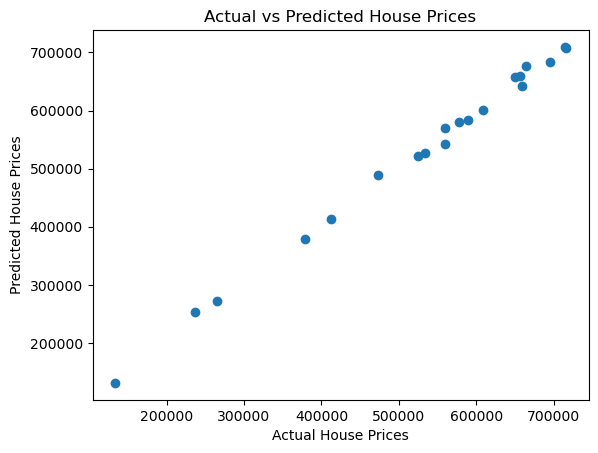

In [26]:
#o	Create a scatter plot comparing the actual and predicted values of the target variable for the test set.
plt.scatter(y_test, y_pred)
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.title('Actual vs Predicted House Prices')
plt.show()

# 8.	Create a Prediction Function:

In [27]:
#o	Implement a function that takes input features and returns the predicted house price.
def predict_house_price(square_footage, num_bedrooms, house_age):
    input_features = pd.DataFrame({
        'Square_Footage': [square_footage],
        'Num_Bedrooms': [num_bedrooms],
        'House_Age': [house_age]
    })
    predicted_price = model.predict(input_features)
    return predicted_price[0]


# 9.	Determine feature importance and visualize it:

          Feature   Coefficient    Importance
1    Num_Bedrooms  21294.459583  21294.459583
2       House_Age   -274.572639    274.572639
0  Square_Footage    151.233041    151.233041


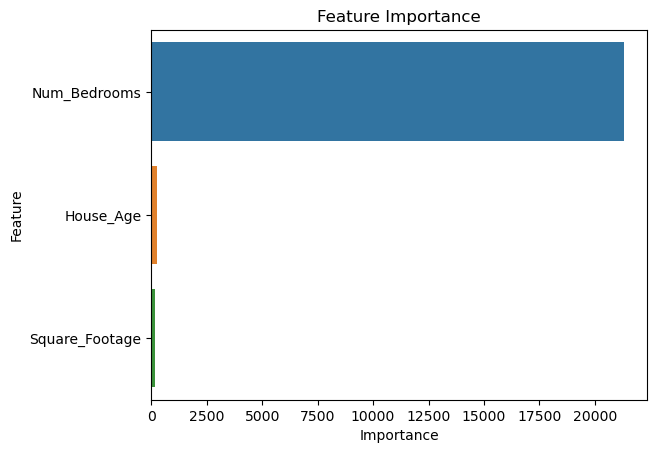

In [31]:
#o	This will determine which features contribute the most to the model's predictions. 
#In the context of linear regression, the importance of a feature can be gauged by looking at the absolute value of
# its coefficients.Higher absolute values indicate greater importance.

coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
coefficients['Importance'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='Importance', ascending=False)

print(coefficients)

# Visualize Feature Importance
sns.barplot(x='Importance', y='Feature', data=coefficients)
plt.title('Feature Importance')
plt.show()


# 10.	Normalize the data using StandardScaler from scikit-learn and check its impact on the model performance:

In [32]:
#o	This can be particularly useful for models like linear regression where different scales of features can affect the 
# coefficients and model performance.

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model on scaled data
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)

# Predict and evaluate on scaled data
y_pred_scaled = model_scaled.predict(X_test_scaled)
mse_scaled = mean_squared_error(y_test, y_pred_scaled)
r2_scaled = r2_score(y_test, y_pred_scaled)

print(f'Scaled Mean Squared Error: {mse_scaled}')
print(f'Scaled R-squared Score: {r2_scaled}')

Scaled Mean Squared Error: 91726130.73039182
Scaled R-squared Score: 0.9965233213503353


In [33]:
# Example house features
square_footage = 2000
num_bedrooms = 3
house_age = 10

# Predict the house price
predicted_price = predict_house_price(square_footage, num_bedrooms, house_age)
print(f"The predicted price for the house is: ${predicted_price:.2f}")


The predicted price for the house is: $404879.43


In [34]:
# Predict house prices for different square footages
square_footages = [1500, 2000, 2500, 3000]
num_bedrooms = 3
house_age = 10

for sqft in square_footages:
    predicted_price = predict_house_price(sqft, num_bedrooms, house_age)
    print(f"The predicted price for a house with {sqft} square feet is: ${predicted_price:.2f}")


The predicted price for a house with 1500 square feet is: $329262.91
The predicted price for a house with 2000 square feet is: $404879.43
The predicted price for a house with 2500 square feet is: $480495.95
The predicted price for a house with 3000 square feet is: $556112.47
